In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.express as px
import ipywidgets as widgets
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


In [339]:

#data = pd.read_csv("DATOS ADD_VISUALIZACION.CSV", decimal=',')
data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_29092022.csv",sep=';', decimal=',')
data

,FECHA_PETICION,Año,LABORATORIO,REGION,CODIGO_REGION,PETICION,Identificador,SEXO,Adulto_Niño,MACROZONA,Estaciones_año,Edad,VITAMINA D,FOSFORO,CALCIO,CREATININA,COVID-19
0,02/01/2018 8:17,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,22.87,5.5,10.9,0.90,NaN
1,02/01/2018 8:18,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,15.04,NaN,NaN,NaN,NaN
2,02/01/2018 8:24,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,17.17,4.1,9.6,0.80,NaN
3,02/01/2018 8:32,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,14.44,4.3,9.6,0.60,NaN
4,02/01/2018 8:33,2018,LA SERENA,Región de Coquimbo,4,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,15.52,NaN,NaN,0.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212521,31/12/2021 12:20,2021,SANTIAGO,Región Metropolitana de Santiago,13,6583559,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,41,6.62,NaN,NaN,NaN,NaN
212522,31/12/2021 12:35,2021,SANTIAGO,Región Metropolitana de Santiago,13,6583737,"1,18E+12",F,Adulto,CENTRO,PRIMAVERA,63,14.53,NaN,NaN,NaN,NaN
212523,31/12/2021 13:01,2021,SANTIAGO,Región Metropolitana de Santiago,13,6583960,"1,13E+13",M,Niño,CENTRO,PRIMAVERA,1,6.61,5.9,9.7,0.31,NaN
212524,31/12/2021 13:17,2021,SANTIAGO,Región Metropolitana de Santiago,13,6584013,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,45,18.50,NaN,NaN,NaN,NaN


In [340]:
data.columns = data.columns.str.upper()
data.head(5)

,FECHA_PETICION,AÑO,LABORATORIO,REGION,CODIGO_REGION,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,VITAMINA D,FOSFORO,CALCIO,CREATININA,COVID-19
0,02/01/2018 8:17,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,22.87,5.5,10.9,0.90,NaN
1,02/01/2018 8:18,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,15.04,NaN,NaN,NaN,NaN
2,02/01/2018 8:24,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,17.17,4.1,9.6,0.80,NaN
3,02/01/2018 8:32,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,14.44,4.3,9.6,0.60,NaN
4,02/01/2018 8:33,2018,LA SERENA,Región de Coquimbo,4,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,15.52,NaN,NaN,0.66,NaN


In [341]:
Grafico_estaciones=data[['AÑO','ESTACIONES_AÑO','VITAMINA D']]#list(Grafico_wpp)
Grafico_estaciones

,AÑO,ESTACIONES_AÑO,VITAMINA D
0,2018,VERANO,22.87
1,2018,VERANO,15.04
2,2018,VERANO,17.17
3,2018,VERANO,14.44
4,2018,VERANO,15.52
...,...,...,...
212521,2021,PRIMAVERA,6.62
212522,2021,PRIMAVERA,14.53
212523,2021,PRIMAVERA,6.61
212524,2021,PRIMAVERA,18.50


In [342]:
Grafico_estaciones=Grafico_estaciones.groupby(['AÑO','ESTACIONES_AÑO']).agg({'VITAMINA D':'mean'})

Grafico_estaciones=Grafico_estaciones.reset_index()
Grafico_estaciones

,AÑO,ESTACIONES_AÑO,VITAMINA D
0,2018,INVIERNO,16.286891
1,2018,OTOÑO,23.606977
2,2018,PRIMAVERA,19.313291
3,2018,VERANO,25.453591
4,2019,INVIERNO,20.838293
5,2019,OTOÑO,23.520736
6,2019,PRIMAVERA,23.607700
7,2019,VERANO,26.582004
8,2020,INVIERNO,18.778876
9,2020,OTOÑO,24.235388


In [343]:
CONDICIONES=[Grafico_estaciones['ESTACIONES_AÑO']=='VERANO',
             Grafico_estaciones['ESTACIONES_AÑO']=='OTOÑO',
             Grafico_estaciones['ESTACIONES_AÑO']=='INVIERNO',
             Grafico_estaciones['ESTACIONES_AÑO']=='PRIMAVERA'           
            ]
RESPUESTA=[1,2,3,4]
Grafico_estaciones['ESTACIONES_ORDEN']=np.select(CONDICIONES,RESPUESTA)
Grafico_estaciones

,AÑO,ESTACIONES_AÑO,VITAMINA D,ESTACIONES_ORDEN
0,2018,INVIERNO,16.286891,3
1,2018,OTOÑO,23.606977,2
2,2018,PRIMAVERA,19.313291,4
3,2018,VERANO,25.453591,1
4,2019,INVIERNO,20.838293,3
5,2019,OTOÑO,23.520736,2
6,2019,PRIMAVERA,23.607700,4
7,2019,VERANO,26.582004,1
8,2020,INVIERNO,18.778876,3
9,2020,OTOÑO,24.235388,2


In [344]:
Grafico_estaciones=Grafico_estaciones.sort_values(by=['AÑO','ESTACIONES_ORDEN'],ascending=[True,True])


In [345]:
Grafico_estaciones=Grafico_estaciones.loc[:,['AÑO','ESTACIONES_AÑO','VITAMINA D']]
Grafico_estaciones

,AÑO,ESTACIONES_AÑO,VITAMINA D
3,2018,VERANO,25.453591
1,2018,OTOÑO,23.606977
0,2018,INVIERNO,16.286891
2,2018,PRIMAVERA,19.313291
7,2019,VERANO,26.582004
5,2019,OTOÑO,23.520736
4,2019,INVIERNO,20.838293
6,2019,PRIMAVERA,23.607700
11,2020,VERANO,27.338614
9,2020,OTOÑO,24.235388


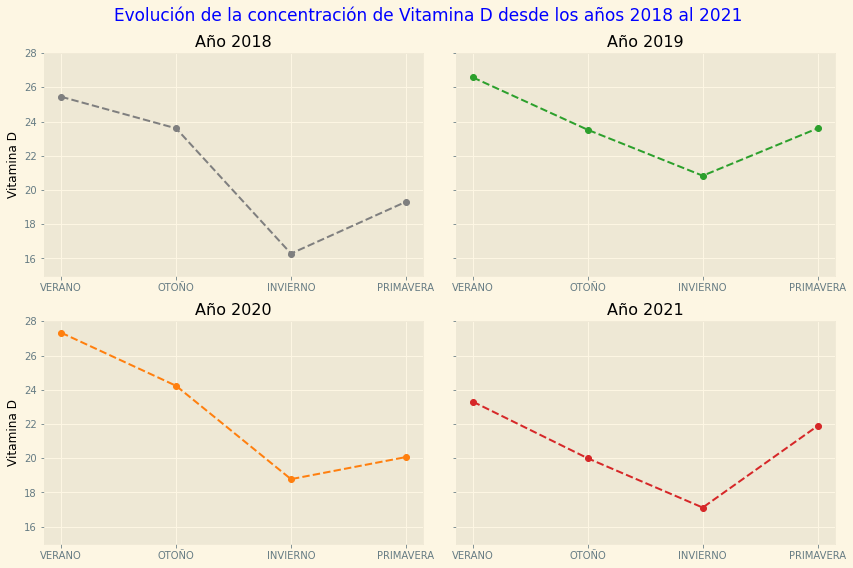

In [346]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
with plt.style.context('Solarize_Light2'): #dark_background
    fig, ax = plt.subplots(2, 2,figsize=(12,8),sharey = True, constrained_layout=True, )
#a=np.linspace(0,10,10)
    Estaciones = ['VERANO', 'OTOÑO', 'INVIERNO', 'PRIMAVERA']
    Vitamina_D = {'2018':Grafico_estaciones.iloc[:4,2:], '2019':Grafico_estaciones.iloc[4:8,2:],
                    '2020':Grafico_estaciones.iloc[8:12,2:], '2021':Grafico_estaciones.iloc[12:16,2:]}

    ax[0,0].plot(Estaciones, Vitamina_D['2018'], color = 'tab:grey', marker='o', linestyle='dashed')
    ax[0,1].plot(Estaciones, Vitamina_D['2019'], color = 'tab:green',marker='o',linestyle='dashed')
    ax[1,0].plot(Estaciones, Vitamina_D['2020'], color = 'tab:orange',marker='o',linestyle='dashed')
    ax[1,1].plot(Estaciones, Vitamina_D['2021'], color = 'tab:red',marker='o',linestyle='dashed')
    ax[0,0].set_title("Año 2018")
    ax[0,1].set_title("Año 2019")
    ax[1,0].set_title("Año 2020")
    ax[1,1].set_title("Año 2021")
#ax[0,0]annotate(EstacionesVitamina_D['2018']=(8, 0))
# ax.annotate("Sine", xy=(8, 0),
# xycoords='data', xytext=(10.5, 0),
# textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
#ax.set_xlim(0, 4)
#ax[0,0].xaxis.grid
    ax[0,0].set_ylim(15, 28)
    ax[0,0].set_ylabel('Vitamina D', color='black')
    ax[1,0].set_ylabel('Vitamina D', color='black')
#ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
#ax.legend(loc = 'upper right')
    plt.suptitle('Evolución de la concentración de Vitamina D desde los años 2018 al 2021',fontsize=17, color='b')

    fig.tight_layout()
plt.show()

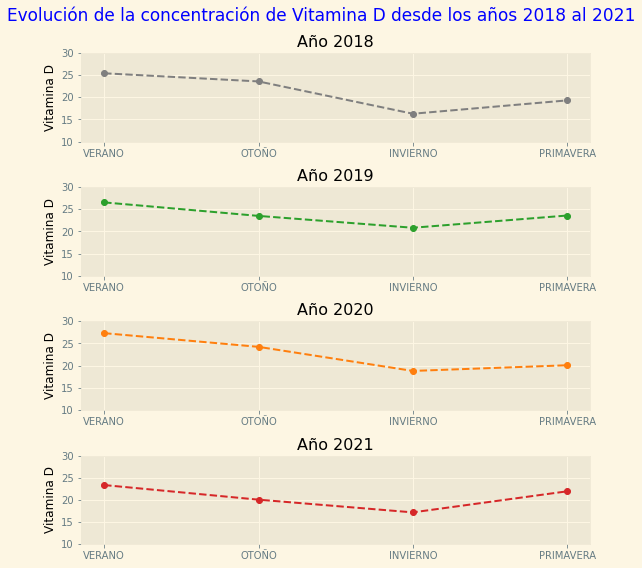

In [369]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
with plt.style.context('Solarize_Light2'): #dark_background
    fig, ax = plt.subplots(4, 1,figsize=(8,8),sharey = True, constrained_layout=True, )
    #plt.ylabel('vitamina D (ng/mL)')
#a=np.linspace(0,10,10)
    Estaciones = ['VERANO', 'OTOÑO', 'INVIERNO', 'PRIMAVERA']
    Vitamina_D = {'2018':Grafico_estaciones.iloc[:4,2:], '2019':Grafico_estaciones.iloc[4:8,2:],
                    '2020':Grafico_estaciones.iloc[8:12,2:], '2021':Grafico_estaciones.iloc[12:16,2:]}

    ax[0].plot(Estaciones, Vitamina_D['2018'], color = 'tab:grey', marker='o', linestyle='dashed')
    ax[1].plot(Estaciones, Vitamina_D['2019'], color = 'tab:green',marker='o',linestyle='dashed')
    ax[2].plot(Estaciones, Vitamina_D['2020'], color = 'tab:orange',marker='o',linestyle='dashed')
    ax[3].plot(Estaciones, Vitamina_D['2021'], color = 'tab:red',marker='o',linestyle='dashed')
    ax[0].set_title("Año 2018")
    ax[1].set_title("Año 2019")
    ax[2].set_title("Año 2020")
    ax[3].set_title("Año 2021")
#ax[0,0]annotate(EstacionesVitamina_D['2018']=(8, 0))
# ax.annotate("Sine", xy=(8, 0),
# xycoords='data', xytext=(10.5, 0),
# textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
#ax.set_xlim(0, 4)
#ax[0,0].xaxis.grid
    ax[0].set_ylim(10, 30)
    ax[0].set_ylabel('Vitamina D', color='black')
    ax[1].set_ylabel('Vitamina D', color='black')
    ax[2].set_ylabel('Vitamina D', color='black')
    ax[3].set_ylabel('Vitamina D', color='black')
    
    
#ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
#ax.legend(loc = 'upper right')
    plt.suptitle('Evolución de la concentración de Vitamina D desde los años 2018 al 2021',fontsize=17, color='b')
    
    fig.tight_layout()
plt.show()

In [36]:
Grafico_estaciones

,AÑO,ESTACIONES_AÑO,VITAMINA D
3,2018,VERANO,25.453591
1,2018,OTOÑO,23.606977
0,2018,INVIERNO,16.286891
2,2018,PRIMAVERA,19.313291
7,2019,VERANO,26.582004
5,2019,OTOÑO,23.520736
4,2019,INVIERNO,20.838293
6,2019,PRIMAVERA,23.607700
11,2020,VERANO,27.338614
9,2020,OTOÑO,24.235388


In [371]:
VitD_Ca=data[['AÑO','VITAMINA D','CALCIO', 'FOSFORO']]#list(Grafico_wpp)
VitD_Ca

,AÑO,VITAMINA D,CALCIO,FOSFORO
0,2018,22.87,10.9,5.5
1,2018,15.04,NaN,NaN
2,2018,17.17,9.6,4.1
3,2018,14.44,9.6,4.3
4,2018,15.52,NaN,NaN
...,...,...,...,...
212521,2021,6.62,NaN,NaN
212522,2021,14.53,NaN,NaN
212523,2021,6.61,9.7,5.9
212524,2021,18.50,NaN,NaN


In [92]:
VitD_Ca=VitD_Ca.groupby(['AÑO']).agg({'VITAMINA D':'mean','CALCIO':'mean','FOSFORO':'mean'})
VitD_Ca

,VITAMINA D,CALCIO,FOSFORO
AÑO,,,
2018,20.861393,9.631929,4.051145
2019,23.515718,9.666053,4.050896
2020,22.032825,9.320467,3.877068
2021,20.450111,9.285490,3.813380


In [93]:

VitD_Ca=VitD_Ca.reset_index()
VitD_Ca

,AÑO,VITAMINA D,CALCIO,FOSFORO
0,2018,20.861393,9.631929,4.051145
1,2019,23.515718,9.666053,4.050896
2,2020,22.032825,9.320467,3.877068
3,2021,20.450111,9.285490,3.813380


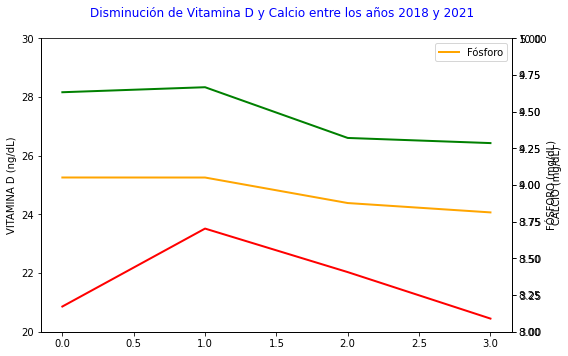

In [337]:
import matplotlib.pyplot as plt
%matplotlib inline
#fig = plt.figure()
fig,ax1=plt.subplots(figsize=(8,5))
#ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
ax3 = ax1.twinx() #Nuevo
#fig=plt.figsize(12,8)

VitD_Ca["VITAMINA D"].plot(kind="line",color="red", ax=ax2, lw=2, label=" Vitamina D")
VitD_Ca["CALCIO"].plot(kind='line', color="green",  ax=ax1, lw=2, label= "Calcio")
VitD_Ca["FOSFORO"].plot(kind='line', color="orange",  ax=ax3, lw=2, label= "Fósforo")



#p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
#p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
#p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")
#ax1.set_xlim(2018, 2021)
ax1.set_ylim(8, 10)
ax2.set_ylim(20,30)
ax3.set_ylim(3, 5)
ax1.set_xlim()


ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_left()
ax3.yaxis.set_label_position("right")
#ax3.yaxis.tick_right()
ax1.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)

fig.suptitle("Disminución de Vitamina D y Calcio entre los años 2018 y 2021 ", color ='b')
ax2.set_ylabel("VITAMINA D (ng/dL)")
ax1.set_ylabel("CALCIO (mg/dL)")
ax3.set_ylabel("FÓSFORO (mg/dL)")
fig.tight_layout()
plt.legend()
plt.show()

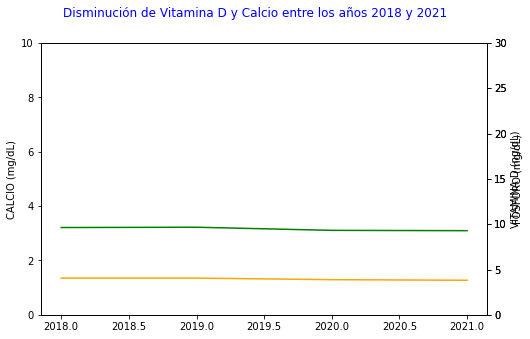

In [311]:
import matplotlib.pyplot as plt
%matplotlib inline
#fig = plt.figure()
fig,ax1=plt.subplots(figsize=(8,5))
#ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
ax3 = ax1.twinx() #Nuevo
#fig=plt.figsize(12,8)

#VitD_Ca["VITAMINA D"].plot(kind="line",color="red", ax=ax2, lw=2, label=" Vitamina D")
#VitD_Ca["CALCIO"].plot(kind='line', color="green",  ax=ax1, lw=2, label= "Calcio")
#VitD_Ca["FOSFORO"].plot(kind='line', color="orange",  ax=ax3, lw=2, label= "Fósforo")


ax1.plot(VitD_Ca["AÑO"],VitD_Ca["VITAMINA D"],color='r')
ax2.plot(VitD_Ca["AÑO"],VitD_Ca["CALCIO"], color='g')
ax3.plot(VitD_Ca["AÑO"],VitD_Ca["FOSFORO"], color='orange')

#p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
#p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
#p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")
#ax1.set_xlim(2018, 2021)
ax1.set_ylim(0, 10)
ax2.set_ylim(0,30)
ax3.set_ylim(0, 30)
#ax1.set_xlim(2018, 2021)


#ax1.yaxis.set_label_position("right")
#ax1.yaxis.tick_right()
#ax2.yaxis.set_label_position("left")
#ax2.yaxis.tick_left()
#ax3.yaxis.set_label_position("right")
#ax3.yaxis.tick_right()
#ax1.spines['top'].set_visible(False)
#ax3.spines['top'].set_visible(False)

fig.suptitle("Disminución de Vitamina D y Calcio entre los años 2018 y 2021 ", color ='b')
ax2.set_ylabel("VITAMINA D (ng/dL)")
ax1.set_ylabel("CALCIO (mg/dL)")
ax3.set_ylabel("FÓSFORO (mg/dL)")
#fig.tight_layout()
#plt.legend()
plt.show()

In [142]:
VitD_Ca["VITAMINA D"]
VitD_Ca["VITAMINA D"].tolist()

[20.861392842266017, 23.51571799192879, 22.032824579810338, 20.45011109753258]

In [135]:
a=[0, 1, 2]
type(a)

list

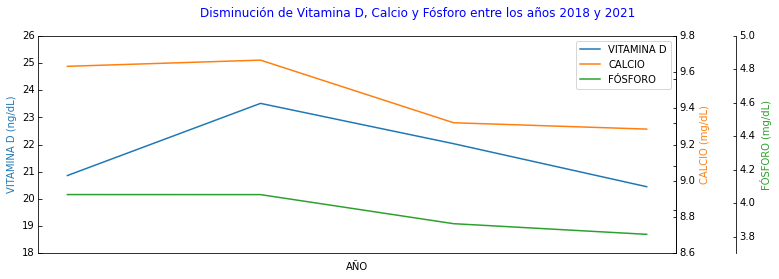

In [336]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
#fig,ax1=plt.subplots(figsize=(18,10))

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=1.6)
fontsize=14

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)
par1.axis["right"].toggle(all=True)

#host.set_xlim(-0.5,3.5)
host.set_ylim(18, 26, 4)

host.set_xlabel("AÑO")
host.set_ylabel("VITAMINA D (ng/dL)")
par1.set_ylabel("CALCIO (mg/dL)")
par2.set_ylabel("FÓSFORO (mg/dL)")

p1, = host.plot(VitD_Ca["AÑO"].tolist(),VitD_Ca["VITAMINA D"].tolist(), label="VITAMINA D")
p2, = par1.plot(VitD_Ca["AÑO"].tolist(),VitD_Ca["CALCIO"].tolist(), label="CALCIO")
p3, = par2.plot(VitD_Ca["AÑO"].tolist(),VitD_Ca["FOSFORO"].tolist(), label="FÓSFORO")


lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

#par2.spines['right'].set_position(('outward', 40))


par2.xaxis.set_ticks([])

#host.axis.label.set_color(p1.get_color())
#par1.axis.label.set_color(p2.get_color())
#par2.axis.label.set_color(p3.get_color())


par1.set_ylim(8.6, 9.8)
par2.set_ylim(3.7, 5)



host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())
host.spines['top'].set_visible(False)
host.legend()
plt.suptitle("Disminución de Vitamina D, Calcio y Fósforo entre los años 2018 y 2021 ",
             horizontalalignment = 'left', fontsize=12, color ='b')
             #3x=1,
             #y=2)
             #transform=fig.transFigure)
plt.draw()
fig.tight_layout()
plt.show()

#plt.savefig("Test")

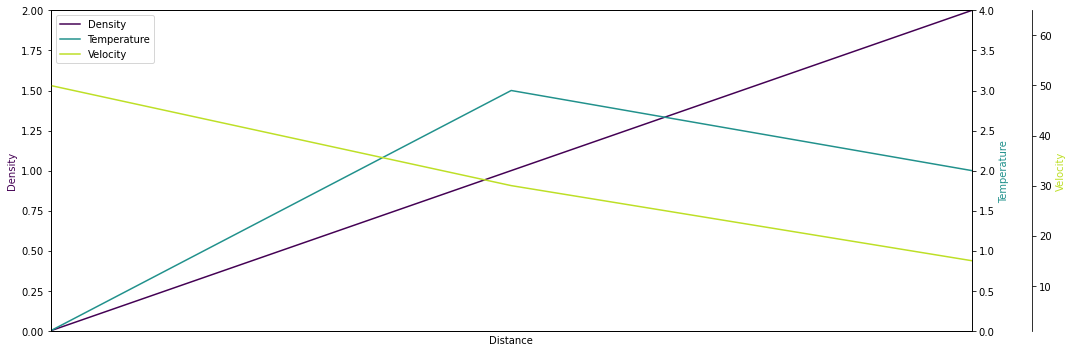

In [206]:
import matplotlib.pyplot as plt 

# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(15,5)) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
    
host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)
    
host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot([0, 1, 2], [0, 1, 2],    color=color1, label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2],    color=color2, label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], color=color3, label="Velocity")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))

# no x-ticks                 
par2.xaxis.set_ticks([])

# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

# Adjust spacings w.r.t. figsize
fig.tight_layout()
# Alternatively: bbox_inches='tight' within the plt.savefig function 
#                (overwrites figsize)

# Best for professional typesetting, e.g. LaTeX
plt.savefig("pyplot_multiple_y-axis.pdf")
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=200)'